# HW6

Here, we use the Ricker wavelet to analyse the above wave function.
$$
R_a(x) = A  \left(1 - \left(\frac{x}{a}\right)^2\right) e^{-\frac{x^2}{2a^2}},
$$
where $A = \frac{8}{\sqrt{3a}\pi}$.

Please help me fix the following code to let the output be what we want. You need to implement the wavelet transformation `z = wavelet_transformation(x, y)`, such that
$$
z_i = \sum_j x_{j-i} y_j
$$
You are supposed to implement the fast wavelet transformation that having time complexity $O(n \log(n))$ where $n$ is the size of $x$ and $y$.

The wavelet function can be given as
$$
\phi_{a, t_0}(t) = R_a(t - t_0),
$$
so by defination, the coefficents by the wavelet transform are given by
$$
T(a, t_0) = \int_{-\infty}^{+\infty} x(t)  \phi_{a, t_0}(t) dt = \int_{-\infty}^{+\infty} x(t)  R_a(t_0 - t) dt,
$$
which is a convolution.

By the convolution theorem, the equation above can be transformed as
$$
T(a, t_0) = \mathscr{F}^{-1} \left( \mathscr{F}(x(t)) \cdot \mathscr{F}(R_a(t)) \right),
$$
and by applying the FFT algorithm, we can reach a complexity of $O(N \log{N})$ for each frequency $a$.

The zero-padding strategery is needed, refering to the blog found by Yusheng Zhao:

[FFT Convolution and Zero-Padding](https://www.matecdev.com/posts/julia-fft-convolution.html)

In [1]:
function ricker(x, a)
	A = 8/π/sqrt(3a)
	return A * (1 - (x/a)^2) * exp(-x^2/a^2/2)
end

ricker (generic function with 1 method)

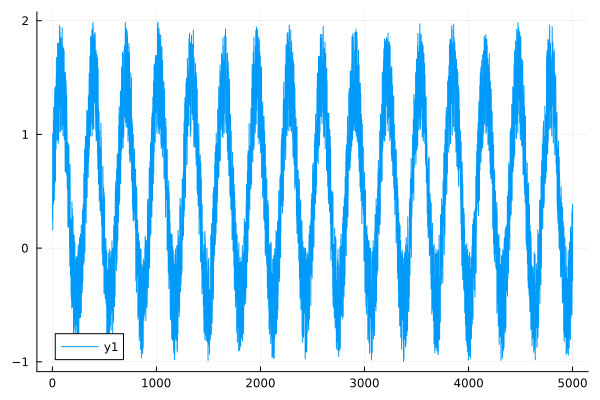

In [2]:
using Plots
N = 5000
brain_signal = sin.(LinRange(0, 1000, N) ./ 10) .+ rand(N)
plot(brain_signal)

In [23]:
using FFTW
function wavelet_transformation(signal::AbstractVector{T}, fw) where T
    M = length(signal)
    N = length(fw)

    signal_pad = [signal; zeros(N - 1)]
    fw_pad = [fw; zeros(M - 1)]


    # resulting_vector = zeros(eltype(fw), M + N - 1)
    resulting_vector = ifft(fft(signal_pad) .* fft(fw_pad))

    return abs.(resulting_vector)
end

wavelet_transformation (generic function with 1 method)

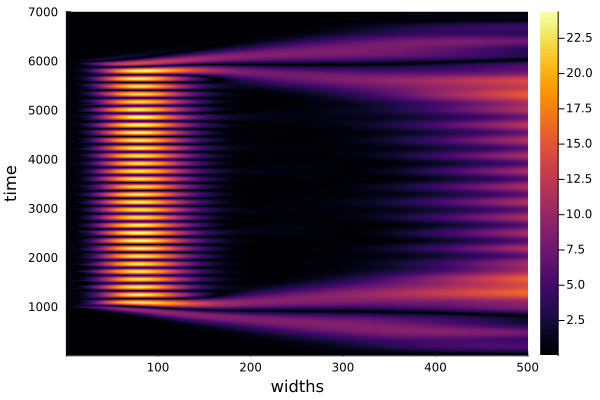

In [26]:
let
	# the width parameter `a` in the Ricker wavelet is 1..500
	widths = 1:N÷10
	res = []
	for (j, a) in enumerate(widths)
		fw = ricker.(-1000:1000, a)   # the descretized wavelet of width `a`
		res_a = wavelet_transformation(brain_signal, fw)
		push!(res, res_a)
	end
	res[1][1]
	heatmap(hcat(res...); ylabel="time", xlabel="widths")
end

The output image shows that the input signal consists mostly of waves of a specific frequency and some high frequency noises.
This fits well with the form of the input wave: a sin wave + a Guassian noise.